In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
blob_centers = np.array(
    [[-1.5, 2.3],
     [0.2, 2.3],
     [-2.8, 2.8],
     [-2.8, 1.82], 
     [-2.8, 1.3]
     ]
)

blob_std = np.array([0.3, 0.4, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=42)

In [4]:
def plot_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=2)
    plt.xlabel("x1")
    plt.ylabel("x2")

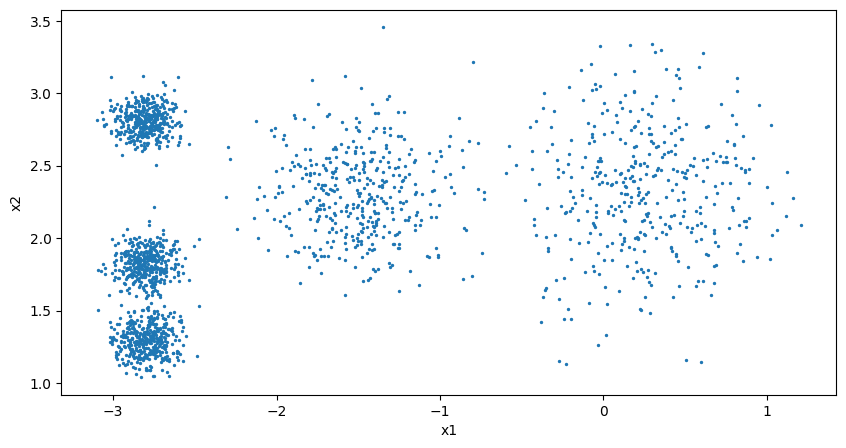

In [5]:
plt.figure(figsize=(10, 5))
plot_cluster(X)
plt.show()

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

y_pred = kmeans.fit_predict(X)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
kmeans.cluster_centers_

array([[ 0.25197644,  2.32421262],
       [-2.79532029,  1.29766896],
       [-2.80082737,  2.80696946],
       [-1.49142615,  2.30441625],
       [-2.79879438,  1.82376164]])

In [8]:
X_new = np.array([[0,2], [3,2], [-3, 3], [-3, 1.8]])
kmeans.predict(X_new)

array([0, 0, 2, 4])

In [9]:
kmeans.inertia_

216.9522864410703

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.661726674534141

In [11]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_batch_kmeans.fit(X)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=5, random_state=42)

In [12]:
mini_batch_kmeans.inertia_

228.65262675777495

In [13]:
from matplotlib.image import imread

image = imread('ladybug.png')

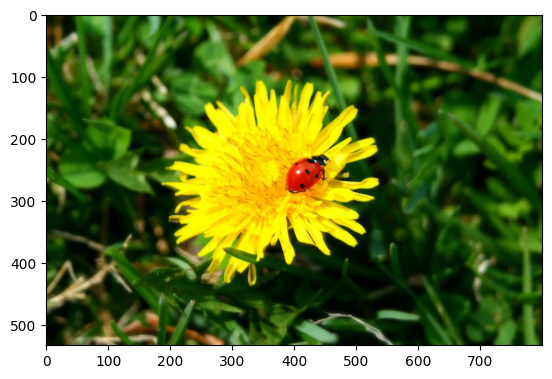

In [14]:
fig, ax = plt.subplots()
ax.imshow(image)
plt.show()

In [15]:
image.shape

(533, 800, 3)

In [16]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [17]:
kmeans = KMeans(n_clusters=5).fit(X)

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


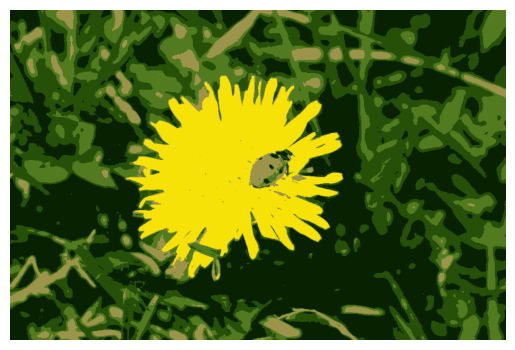

In [18]:
fig, ax = plt.subplots()
ax.imshow(segmented_img)
ax.axis('off')
plt.show()

In [19]:
kmeans.inertia_

5768.71337890625

In [20]:
kmeans.cluster_centers_

array([[0.15087338, 0.31282324, 0.03092611],
       [0.96603113, 0.88662106, 0.02526406],
       [0.3216657 , 0.4818029 , 0.12142615],
       [0.03224921, 0.13277444, 0.00680574],
       [0.6182217 , 0.5841291 , 0.29485074]], dtype=float32)

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

0.9688888888888889


In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                ('kmeans', KMeans(n_clusters=60, random_state=42)),
                ('log_reg', LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42))
])


In [23]:
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)

print(pipeline_score)

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.98


In [24]:
n_labeled = 50

log_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [25]:
kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_distance = kmeans.fit_transform(X_train)

representative_digit_idx = np.argmin(X_digits_distance, axis=0)
X_representative_digits = X_train[representative_digit_idx]

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


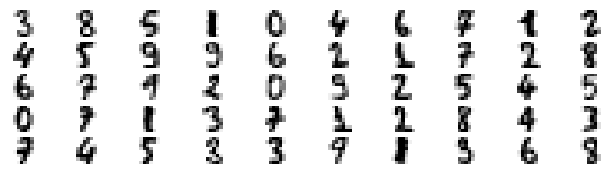

In [26]:
plt.figure(figsize=(8,2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(50 // 10, 10, index+1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap='binary')
    plt.axis('off')

plt.show()

In [27]:
y_representative_digits = np.array([
                                4, 8, 0, 6, 8, 3, 7, 7, 9, 1,
                                5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
                                1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
                                6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 
                                4, 2, 9, 4, 7, 6, 2, 3, 1, 1,
])

In [28]:
log_reg = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.08666666666666667

In [38]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [39]:
print(dbscan.labels_[:10])

[-1 -1 -1 -1 -1 -1  0 -1 -1 -1]


In [40]:
print(len(dbscan.core_sample_indices_))

171


In [41]:
print(dbscan.components_)

[[ 0.27450961 -0.18990367]
 [ 1.92344972 -0.1479766 ]
 [ 0.02784978  0.80583708]
 [ 0.73504792  0.75970823]
 [ 1.73377075 -0.18396233]
 [ 1.85899813  0.00984373]
 [ 0.85962296  0.5882831 ]
 [ 0.25938692 -0.14012639]
 [ 0.86250557  0.0927735 ]
 [ 0.02195966  1.11880174]
 [ 0.26477483 -0.15993378]
 [ 0.25637534 -0.24743502]
 [-0.60245227  0.77192678]
 [ 0.76434396 -0.47959375]
 [-1.04851438  0.40300612]
 [ 0.56353904  0.64232166]
 [ 0.67913121 -0.29640943]
 [ 1.84765907 -0.18202812]
 [ 0.66786136  0.5246904 ]
 [ 0.01427728  0.76632135]
 [ 0.68489298  0.57445563]
 [ 0.47768334  0.86709675]
 [-0.51101164  0.99519215]
 [ 1.97127208 -0.13453646]
 [ 0.8522774  -0.63600778]
 [ 1.71275686 -0.18595296]
 [ 0.69571386 -0.28688713]
 [ 0.72873231 -0.25684329]
 [-0.50158928  1.0244449 ]
 [ 0.23925252  1.04093801]
 [ 1.37785887 -0.52614698]
 [ 0.25740755 -0.19879262]
 [ 1.94776063 -0.13962043]
 [ 0.5042731   0.97477536]
 [ 0.72730653 -0.48771036]
 [-1.03317633  0.37653723]
 [ 0.50076541  0.93710406]
 

In [42]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [43]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

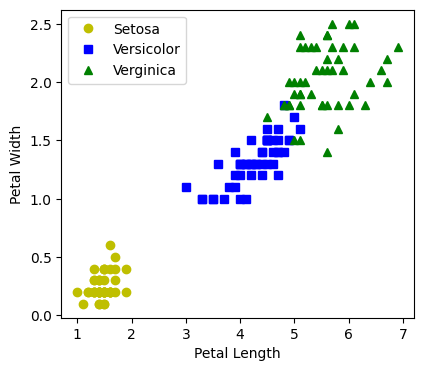

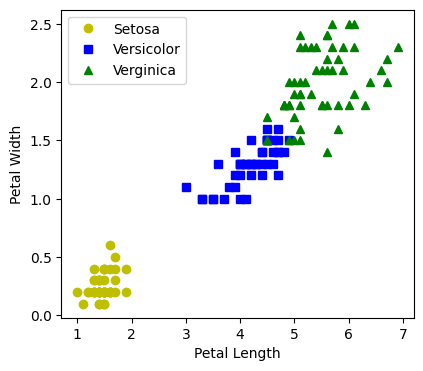

In [48]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], 'yo', label='Setosa')
plt.plot(X[y == 1, 2], X[y == 1, 3], 'bs', label='Versicolor')
plt.plot(X[y == 2, 2], X[y == 2, 3], 'g^', label='Verginica')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.figure(figsize=(10,4))

plt.subplot(122)
plt.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], 'yo', label='Setosa')
plt.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], 'bs', label='Versicolor')
plt.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], 'g^', label='Verginica')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()